In [305]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv(mouse_drug_data_to_load)
clinical_trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
trial = pd.merge(clinical_trial, mouse_drug, on="Mouse ID", how="left")

# Display the data table for preview
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [306]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
volume_mean=trial.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
volume_mean.head()

# Convert to DataFrame
volume_mean=pd.DataFrame(volume_mean)

# Preview DataFrame
volume_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [307]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
volume_sem=trial.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
volume_sem.head()

# Convert to DataFrame
volume_sem=pd.DataFrame(volume_sem)

# Preview DataFrame
volume_sem.head()

pd.DataFrame()

""


In [308]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mean = pd.pivot_table(volume_mean, values='Tumor Volume (mm3)', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
pivot_mean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


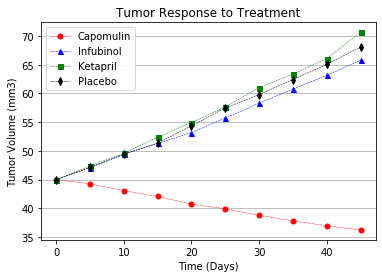

In [310]:
# Generate the Plot (with Error Bars)
scatter=pivot_mean[['Capomulin','Infubinol','Ketapril','Placebo']]
scatter.head()
yerror=volume_sem

Capomulin, =plt.plot(scatter['Capomulin'], marker ='o', color='red', label="Capomulin", linestyle='dashed', linewidth=0.5, markersize=5)
Infubinol, =plt.plot(scatter['Infubinol'], marker ='^', color='blue', label="Infubinol", linestyle='dashed', linewidth=0.5, markersize=5)
Ketapril, =plt.plot(scatter['Ketapril'], marker ='s', color='green', label="Ketapril", linestyle='dashed', linewidth=0.5, markersize=5)
Placebo, =plt.plot(scatter['Placebo'], marker ='d', color='black', label="Placebo", linestyle='dashed', linewidth=0.5, markersize=5)
plt.grid(which='major',axis='y', color='gray', linestyle='-', linewidth=.5)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(handles=[Capomulin, Infubinol,Ketapril,Placebo ], loc="best")

# Save the Figure
plt.savefig("TumorResponse.png")

# Show the Figure
plt.show();

In [311]:
# DO NOT FORGET TO ADD THE ERROR BARS

## Metastatic Response to Treatment

In [312]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
sites_mean=trial.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
sites_mean.head()

# Convert to DataFrame
sites_mean=pd.DataFrame(sites_mean)

# Preview DataFrame
sites_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [313]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sites_sem=trial.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
sites_sem.head()

# Convert to DataFrame
sites_sem=pd.DataFrame(sites_sem)

# Preview DataFrame
sites_sem.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [314]:
# Minor Data Munging to Re-Format the Data Frames
pivot_meta = pd.pivot_table(sites_mean, values='Metastatic Sites', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
pivot_meta.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


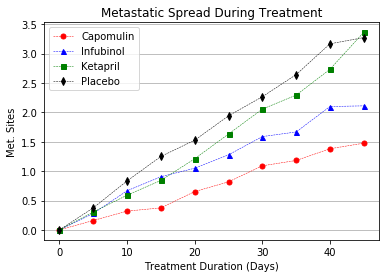

In [315]:
# Generate the Plot (with Error Bars)
scatter=pivot_meta[['Capomulin','Infubinol','Ketapril','Placebo']]
scatter.head()

Capomulin, =plt.plot(scatter['Capomulin'], marker ='o', color='red', label="Capomulin", linestyle='dashed', linewidth=0.5, markersize=5)
Infubinol, =plt.plot(scatter['Infubinol'], marker ='^', color='blue', label="Infubinol", linestyle='dashed', linewidth=0.5, markersize=5)
Ketapril, =plt.plot(scatter['Ketapril'], marker ='s', color='green', label="Ketapril", linestyle='dashed', linewidth=0.5, markersize=5)
Placebo, =plt.plot(scatter['Placebo'], marker ='d', color='black', label="Placebo", linestyle='dashed', linewidth=0.5, markersize=5)
plt.grid(which='major',axis='y', color='gray', linestyle='-', linewidth=.5)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(handles=[Capomulin, Infubinol,Ketapril,Placebo ], loc="best")

# Save the Figure
plt.savefig("MetastaticSpread.png")

# Show the Figure
plt.show();

In [316]:
# DO NOT FORGET TO ADD THE ERROR BARS

## Survival Rates

In [317]:
trial.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [318]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count=trial.groupby(['Drug','Timepoint'])['Mouse ID'].count()
mouse_count.head()

# Convert to DataFrame
mouse_count=pd.DataFrame(mouse_count)

# Preview DataFrame
mouse_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [319]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mouse = pd.pivot_table(mouse_count, values='Mouse ID', index=['Timepoint'], columns=['Drug'])

# Preview that Reformatting worked
pivot_mouse.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


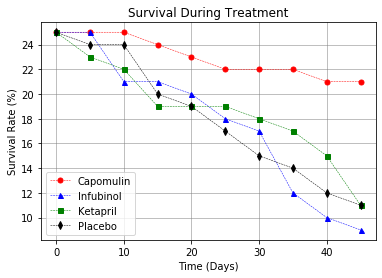

In [322]:
# Generate the Plot (Accounting for percentages)
scatter=pivot_mouse[['Capomulin','Infubinol','Ketapril','Placebo']]
scatter.head()

Capomulin, =plt.plot(scatter['Capomulin'], marker ='o', color='red', label="Capomulin", linestyle='dashed', linewidth=0.5, markersize=5)
Infubinol, =plt.plot(scatter['Infubinol'], marker ='^', color='blue', label="Infubinol", linestyle='dashed', linewidth=0.5, markersize=5)
Ketapril, =plt.plot(scatter['Ketapril'], marker ='s', color='green', label="Ketapril", linestyle='dashed', linewidth=0.5, markersize=5)
Placebo, =plt.plot(scatter['Placebo'], marker ='d', color='black', label="Placebo", linestyle='dashed', linewidth=0.5, markersize=5)
plt.grid(which='major',axis='both', color='gray', linestyle='-', linewidth=.5)
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(handles=[Capomulin, Infubinol,Ketapril,Placebo ], loc="best")

# Save the Figure
plt.savefig("Survival.png")

# Show the Figure
plt.show();


In [323]:
#MAKE SURE TO CHANGE THE Y-AXIS TO 100

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [324]:
# Calculate the percent changes for each drug
per_change = trial.pivot_table(index='Drug', columns='Timepoint', values='Tumor Volume (mm3)')
per_change['% Change']=(per_change[45]-per_change[0])/per_change[0]*100

# Display the data to confirm
per_change2=per_change[['% Change']]
per_change2.iloc[0:]

Drugs=['Capomulin', 'Infubinol','Ketapril','Placebo']
per_change3=per_change2[per_change2.index.isin(Drugs)]
per_change3

Timepoint,% Change
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


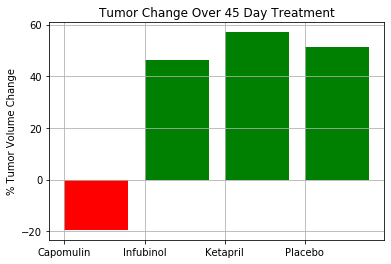

In [325]:
x_axis = np.arange(len(per_change3))
yticks=np.arange(-20, 80, step=20)
y= per_change3['% Change']

mask1 = y < 0
mask2 = y >= 0
# plt.bar(x_axis[mask1], y[mask1], color = 'red')
# plt.bar(x[mask2], y[mask2], color = 'blue')
# plt.bar
plt.bar(x_axis[mask1], y[mask1], color='red', align="edge")
plt.bar(x_axis[mask2], y[mask2], color='green', align="edge")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, per_change3.index)
plt.yticks(yticks)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.grid(which='major',axis='both')

# Save the Figure
plt.savefig("barchart.png")

# Show the Figure
plt.show();

In [326]:
# DON'T FORGET TO ADD THE PERCENTAGES ON THE BAR CHART

In [327]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)